# Semana eda 


## Análise exploratoria de dados

- Uma escola necessita trabalhar com filmes em seu planejamento pedagógico. 
- Precisa visualizar as notas de diversos filmes em suas diversas categorias.
- Os filmes devem atravessar gerações. A escola trabalha desde a creche até ao nível superior.

In [2]:
import pandas as pd

In [3]:
url = "dataset/movies.csv"
url2 = "dataset/ratings.csv" 
pd.read_csv(url)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df= pd.read_csv(url)

In [5]:
dados2= pd.read_csv(url2)
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
common_ids = df['movieId'].tolist()  
filtered_df2 = dados2[dados2['movieId'].isin(common_ids)]

print(filtered_df2)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [7]:
dados2.columns=['usuario_id','filmes_id','avaliacao','tempo']

In [8]:
dados2['tempo']

0          964982703
1          964981247
2          964982224
3          964983815
4          964982931
             ...    
100831    1493848402
100832    1493850091
100833    1494273047
100834    1493846352
100835    1493846415
Name: tempo, Length: 100836, dtype: int64

In [9]:
dados2.avaliacao.value_counts()

avaliacao
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [10]:
dados2.avaliacao.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
dados2.avaliacao.mean()

np.float64(3.501556983616962)

<Axes: ylabel='Frequency'>

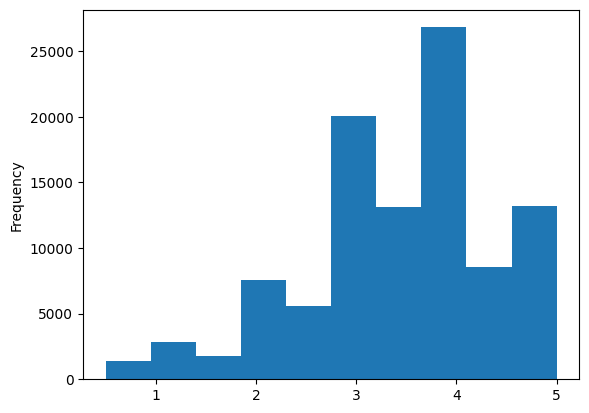

In [12]:
dados2.avaliacao.plot(kind='hist')

In [13]:
dados2.avaliacao.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: avaliacao, dtype: float64

In [14]:
#média, mediana(q2 - segundo quartil, soma)
print(f'Imprimindo a média:{dados2.avaliacao.mean()}')

Imprimindo a média:3.501556983616962


In [15]:
#média, mediana(q2 - segundo quartil, soma)
print(f'Imprimindo a o 2º quartil (mediana):{dados2.avaliacao.median()}')

Imprimindo a o 2º quartil (mediana):3.5


In [16]:
#média, mediana(q2 - segundo quartil, soma)
print(f'Imprimindo a soma:{dados2.avaliacao.sum()}')

Imprimindo a soma:353083.0


In [17]:
import seaborn as sns

In [18]:
notas =dados2.avaliacao

<Axes: ylabel='avaliacao'>

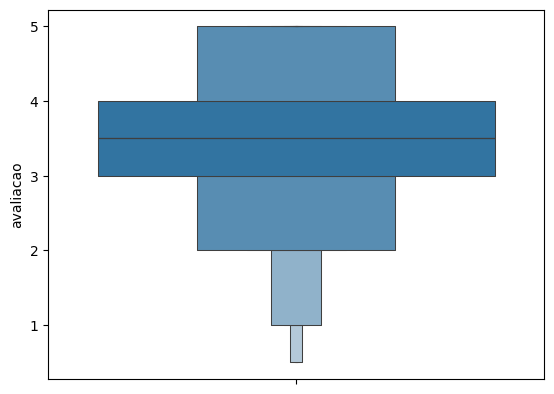

In [19]:
sns.boxenplot(notas)

<Axes: xlabel='avaliacao'>

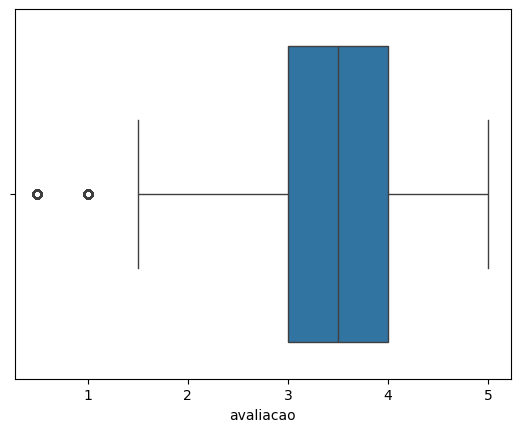

In [20]:
sns.boxplot(x=notas)

In [21]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
df.columns=['filmes_id','titulo','generos']

In [23]:
dados2.head()

,usuario_id,filmes_id,avaliacao,tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
df.query("filmes_id == 1").head()

,filmes_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Como agrupar filme_id calculando a media da avaliação

In [32]:
dados2.query("filmes_id == 1").avaliacao

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: avaliacao, Length: 215, dtype: float64

In [38]:
media_por_filme = dados2.groupby('filmes_id').mean()['avaliacao']
media_por_filme

filmes_id
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: avaliacao, Length: 9724, dtype: float64

<Axes: ylabel='Frequency'>

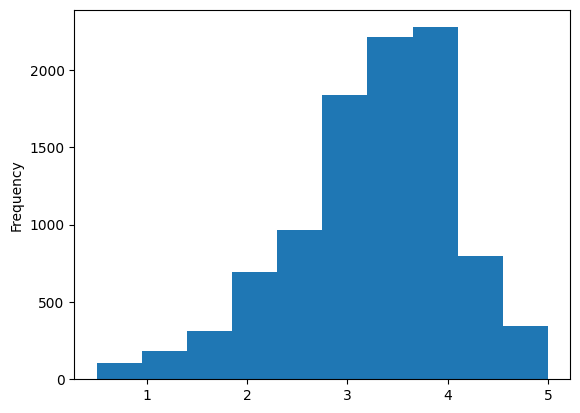

In [44]:
media_por_filme.plot(kind='hist')

In [40]:
media_por_nota = dados2.groupby('avaliacao').mean()['tempo']
media_por_nota

avaliacao
0.5    1.326879e+09
1.0    1.135150e+09
1.5    1.326353e+09
2.0    1.155335e+09
2.5    1.319181e+09
3.0    1.141352e+09
3.5    1.297586e+09
4.0    1.181583e+09
4.5    1.308974e+09
5.0    1.163170e+09
Name: tempo, dtype: float64

<Axes: ylabel='Frequency'>

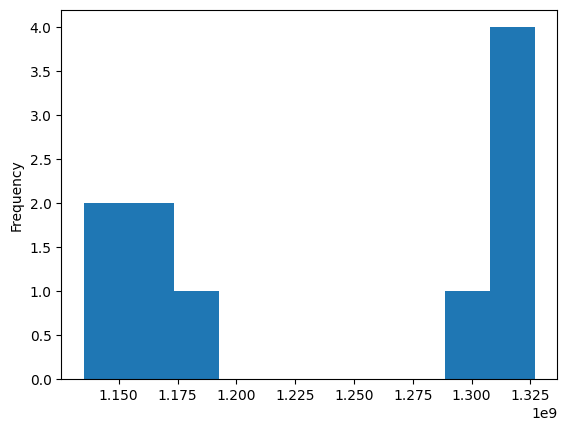

In [43]:
media_por_nota.plot(kind='hist')

<Axes: xlabel='avaliacao'>

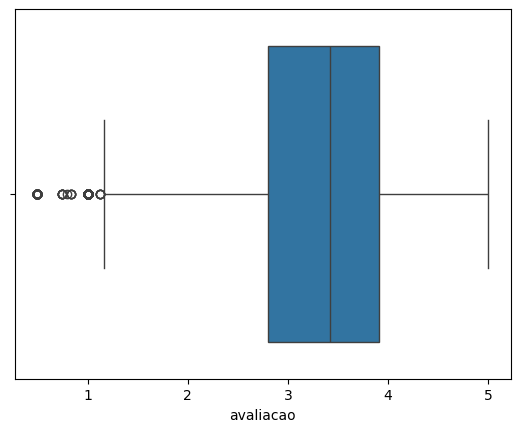

In [45]:
sns.boxplot(x=media_por_filme)

<Axes: xlabel='avaliacao', ylabel='Count'>

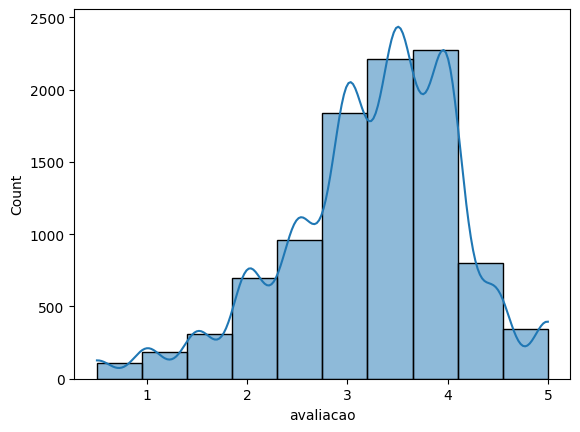

In [51]:
sns.histplot(media_por_filme,kde=True,bins=10)

<Axes: xlabel='tempo', ylabel='Count'>

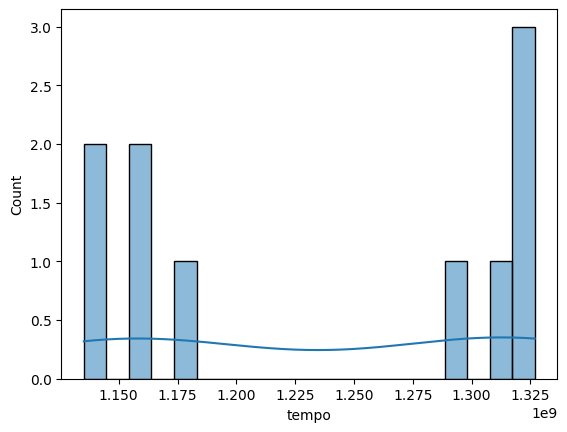

In [56]:
sns.histplot(media_por_nota,kde=True,bins=20)

In [58]:
import matplotlib.pyplot as plt

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

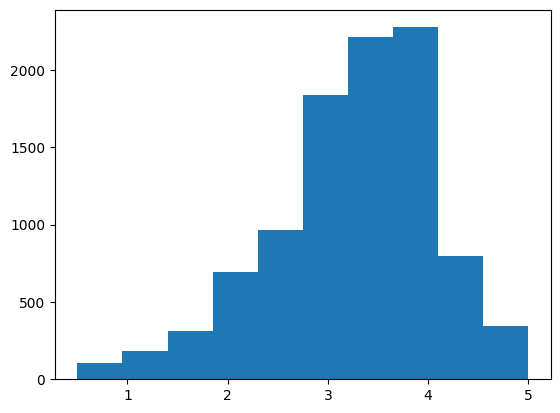

In [59]:
plt.hist(media_por_filme)

(array([2., 2., 1., 0., 0., 0., 0., 0., 1., 4.]),
 array([1.13514993e+09, 1.15432280e+09, 1.17349568e+09, 1.19266855e+09,
        1.21184142e+09, 1.23101429e+09, 1.25018716e+09, 1.26936003e+09,
        1.28853290e+09, 1.30770577e+09, 1.32687864e+09]),
 <BarContainer object of 10 artists>)

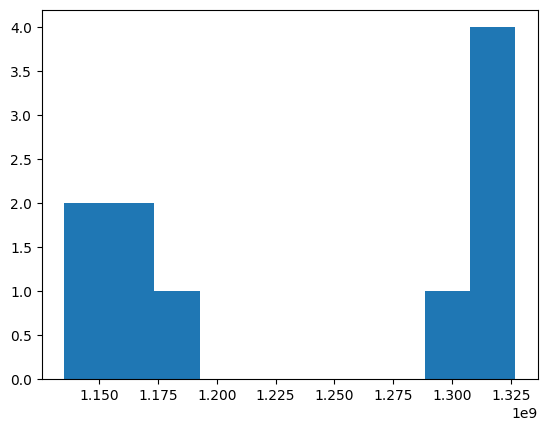

In [60]:
plt.hist(media_por_nota)